In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.utils import resample
import missingno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
%config InlineBackend.figure_format='retina'
COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(COLORS_PALETTE))
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

rcParams['figure.figsize'] = 22, 12

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
df = pd.read_csv(
    "air_data_master.csv",
    parse_dates=['stime'],
    index_col = "stime"
)

In [5]:
df_cp = df.copy()

In [6]:
df_cp

,station_id,lat,lon,RH,UGRD,VGRD,HPBL,TMP,goes_measurement,wind_direction,wind_speed,forest_perc,pop,pop_density,num_vehicles,copd_heart,air_data_value
stime,,,,,,,,,,,,,,,,,
2019-01-02 20:00:00,06-011-0007,NaN,NaN,31.600000,-2.106623,-1.797583,256.61905,282.81880,-0.005922,40.474148,2.769325,NaN,NaN,NaN,NaN,NaN,17.0
2019-01-02 20:00:00,06-019-0500,36.985119,-119.658339,62.200000,1.205877,1.764917,337.49405,281.63130,0.087090,235.657214,2.137539,32.71,39512223.0,657.080463,15065827.0,16914.0,13.0
2019-01-02 20:00:00,06-061-0003,38.935680,-121.099590,61.500000,1.518377,1.014917,270.61905,280.13130,0.094333,213.759655,1.826343,32.71,39512223.0,657.080463,15065827.0,16914.0,21.0
2019-01-02 20:00:00,06-073-1201,33.362593,-117.090230,15.400001,2.080877,-1.610083,1009.30660,288.19380,-0.024185,142.269022,2.631049,32.71,39512223.0,657.080463,15065827.0,16914.0,6.0
2019-01-02 20:00:00,06-079-2004,35.020830,-120.563880,50.700000,2.393377,-1.172583,460.43155,285.19380,-0.014013,153.898472,2.665184,32.71,39512223.0,657.080463,15065827.0,16914.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 23:00:00,49-035-4002,40.662878,-111.901188,25.500000,0.723850,-2.034275,892.42080,273.49664,0.054725,109.586938,2.159221,34.48,3205958.0,101.009610,937421.0,12540.0,6.3
2019-10-16 20:00:00,49-021-0005,37.747430,-113.055525,8.100000,6.964932,4.869552,1664.20080,297.60638,0.010030,214.959432,8.498400,34.48,3205958.0,101.009610,937421.0,12540.0,6.4
2019-10-16 20:00:00,49-035-4002,40.662878,-111.901188,8.900001,2.214932,4.682052,842.38837,297.60638,0.282129,244.682641,5.179530,34.48,3205958.0,101.009610,937421.0,12540.0,8.5


# Remove missing values

In [7]:
df = df.dropna()

In [8]:
df.shape

(23771, 17)

In [9]:
df

,station_id,lat,lon,RH,UGRD,VGRD,HPBL,TMP,goes_measurement,wind_direction,wind_speed,forest_perc,pop,pop_density,num_vehicles,copd_heart,air_data_value
stime,,,,,,,,,,,,,,,,,
2019-01-02 20:00:00,06-019-0500,36.985119,-119.658339,62.200000,1.205877,1.764917,337.49405,281.63130,0.087090,235.657214,2.137539,32.71,39512223.0,657.080463,15065827.0,16914.0,13.0
2019-01-02 20:00:00,06-061-0003,38.935680,-121.099590,61.500000,1.518377,1.014917,270.61905,280.13130,0.094333,213.759655,1.826343,32.71,39512223.0,657.080463,15065827.0,16914.0,21.0
2019-01-02 20:00:00,06-073-1201,33.362593,-117.090230,15.400001,2.080877,-1.610083,1009.30660,288.19380,-0.024185,142.269022,2.631049,32.71,39512223.0,657.080463,15065827.0,16914.0,6.0
2019-01-02 20:00:00,06-079-2004,35.020830,-120.563880,50.700000,2.393377,-1.172583,460.43155,285.19380,-0.014013,153.898472,2.665184,32.71,39512223.0,657.080463,15065827.0,16914.0,7.0
2019-01-02 20:00:00,31-055-0019,41.247486,-95.973142,50.600002,3.268377,2.827417,351.18155,273.06880,0.143575,220.862523,4.321641,3.20,1934408.0,65.267748,683020.0,25287.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 23:00:00,49-035-4002,40.662878,-111.901188,25.500000,0.723850,-2.034275,892.42080,273.49664,0.054725,109.586938,2.159221,34.48,3205958.0,101.009610,937421.0,12540.0,6.3
2019-10-16 20:00:00,49-021-0005,37.747430,-113.055525,8.100000,6.964932,4.869552,1664.20080,297.60638,0.010030,214.959432,8.498400,34.48,3205958.0,101.009610,937421.0,12540.0,6.4
2019-10-16 20:00:00,49-035-4002,40.662878,-111.901188,8.900001,2.214932,4.682052,842.38837,297.60638,0.282129,244.682641,5.179530,34.48,3205958.0,101.009610,937421.0,12540.0,8.5


# Select columns



In [10]:
# selected_cols = ['lat','lon','RH', 'UGRD', 'VGRD', 'HPBL', 'TMP', 'goes_measurement', 'wind_direction', 'wind_speed','forest_perc','pop','pop_density','num_vehicles','copd_heart','air_data_value']
selected_cols = ['lat','lon','RH','HPBL', 'TMP', 'goes_measurement', 'wind_direction', 'wind_speed','pop_density','forest_perc','num_vehicles','copd_heart','air_data_value']
# selected_cols = ['lat','lon','RH', 'TMP', 'goes_measurement', 'wind_direction', 'wind_speed','air_data_value']
df = df[selected_cols]

In [11]:
df

,lat,lon,RH,HPBL,TMP,goes_measurement,wind_direction,wind_speed,pop_density,forest_perc,num_vehicles,copd_heart,air_data_value
stime,,,,,,,,,,,,,
2019-01-02 20:00:00,36.985119,-119.658339,62.200000,337.49405,281.63130,0.087090,235.657214,2.137539,657.080463,32.71,15065827.0,16914.0,13.0
2019-01-02 20:00:00,38.935680,-121.099590,61.500000,270.61905,280.13130,0.094333,213.759655,1.826343,657.080463,32.71,15065827.0,16914.0,21.0
2019-01-02 20:00:00,33.362593,-117.090230,15.400001,1009.30660,288.19380,-0.024185,142.269022,2.631049,657.080463,32.71,15065827.0,16914.0,6.0
2019-01-02 20:00:00,35.020830,-120.563880,50.700000,460.43155,285.19380,-0.014013,153.898472,2.665184,657.080463,32.71,15065827.0,16914.0,7.0
2019-01-02 20:00:00,41.247486,-95.973142,50.600002,351.18155,273.06880,0.143575,220.862523,4.321641,65.267748,3.20,683020.0,25287.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 23:00:00,40.662878,-111.901188,25.500000,892.42080,273.49664,0.054725,109.586938,2.159221,101.009610,34.48,937421.0,12540.0,6.3
2019-10-16 20:00:00,37.747430,-113.055525,8.100000,1664.20080,297.60638,0.010030,214.959432,8.498400,101.009610,34.48,937421.0,12540.0,6.4
2019-10-16 20:00:00,40.662878,-111.901188,8.900001,842.38837,297.60638,0.282129,244.682641,5.179530,101.009610,34.48,937421.0,12540.0,8.5


# Data Investigation and Cleaning

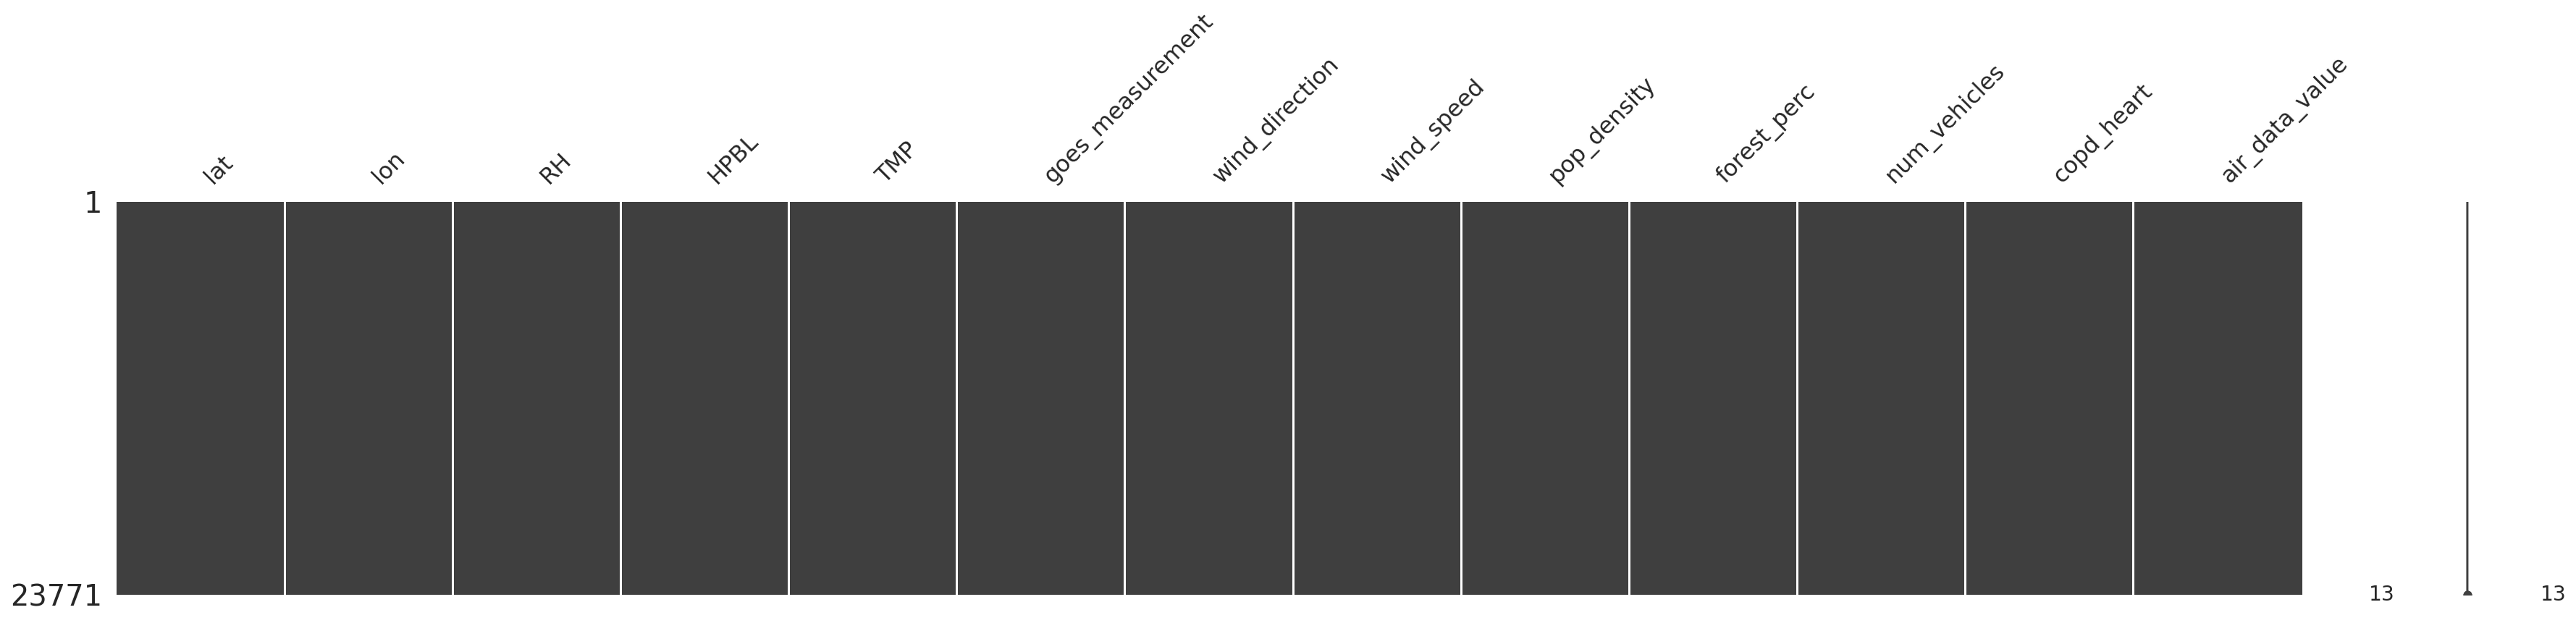

In [12]:
# Check missing values
missingno.matrix(df, figsize = (30,5))

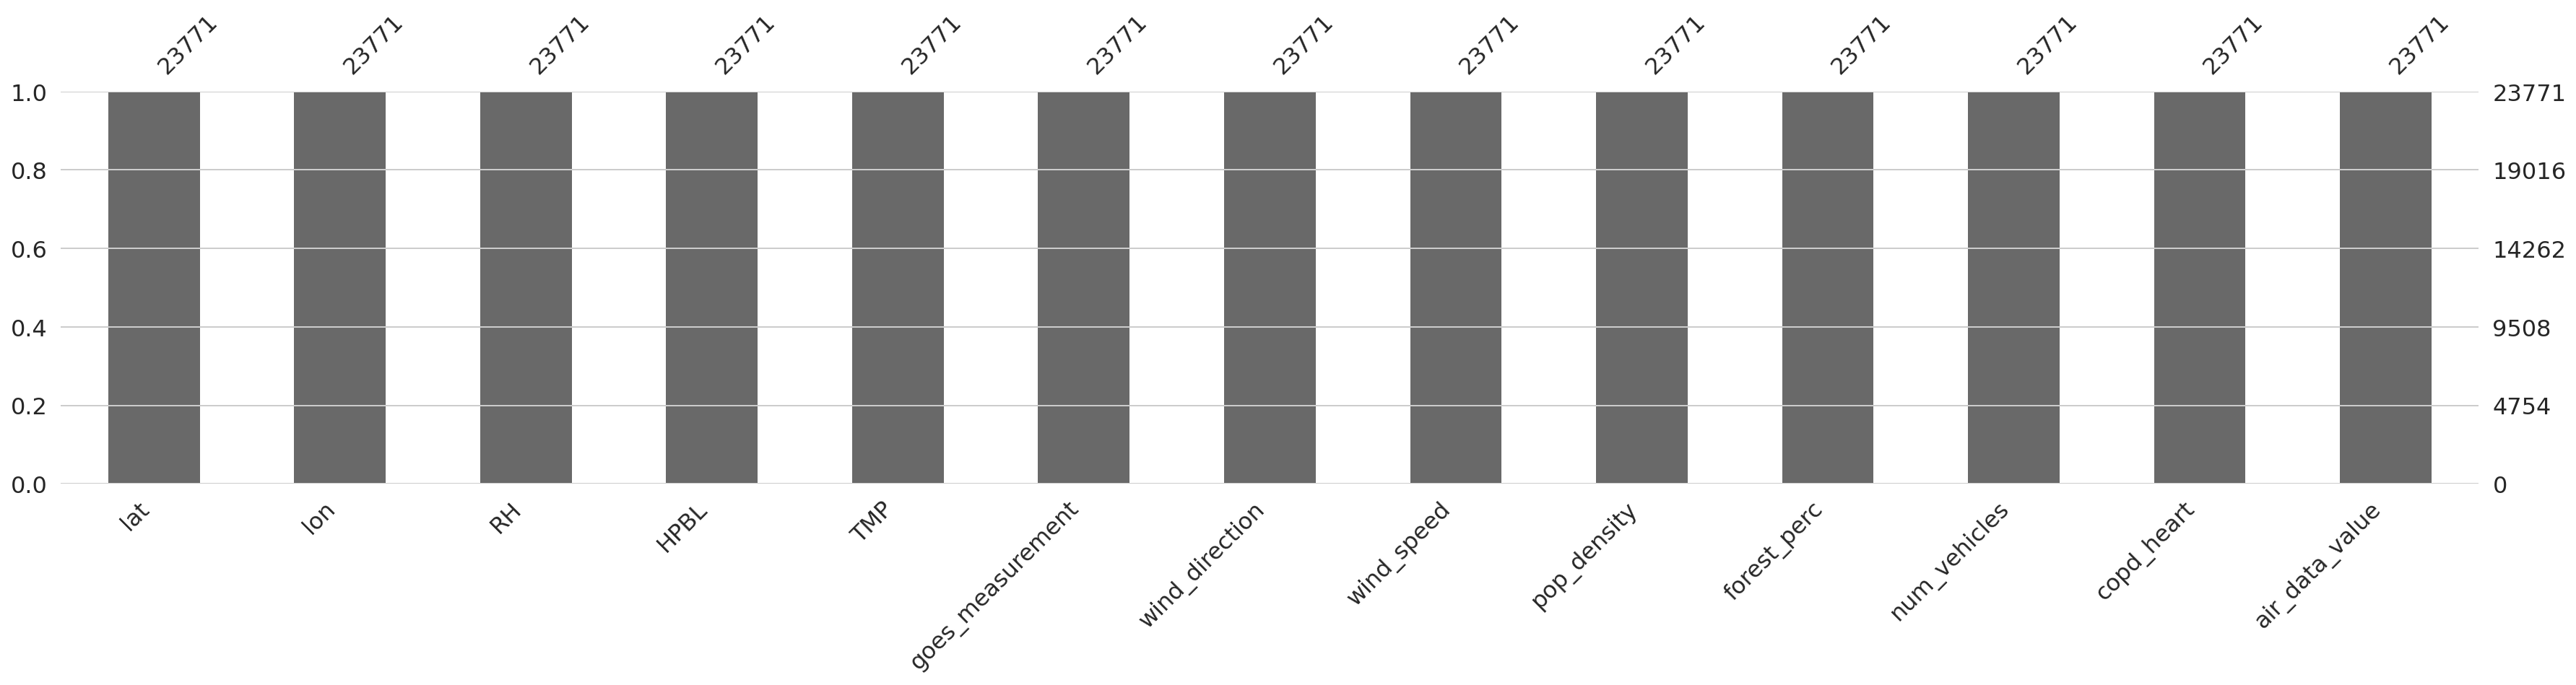

In [13]:
missingno.bar(df, sort='ascending', figsize = (30,5))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


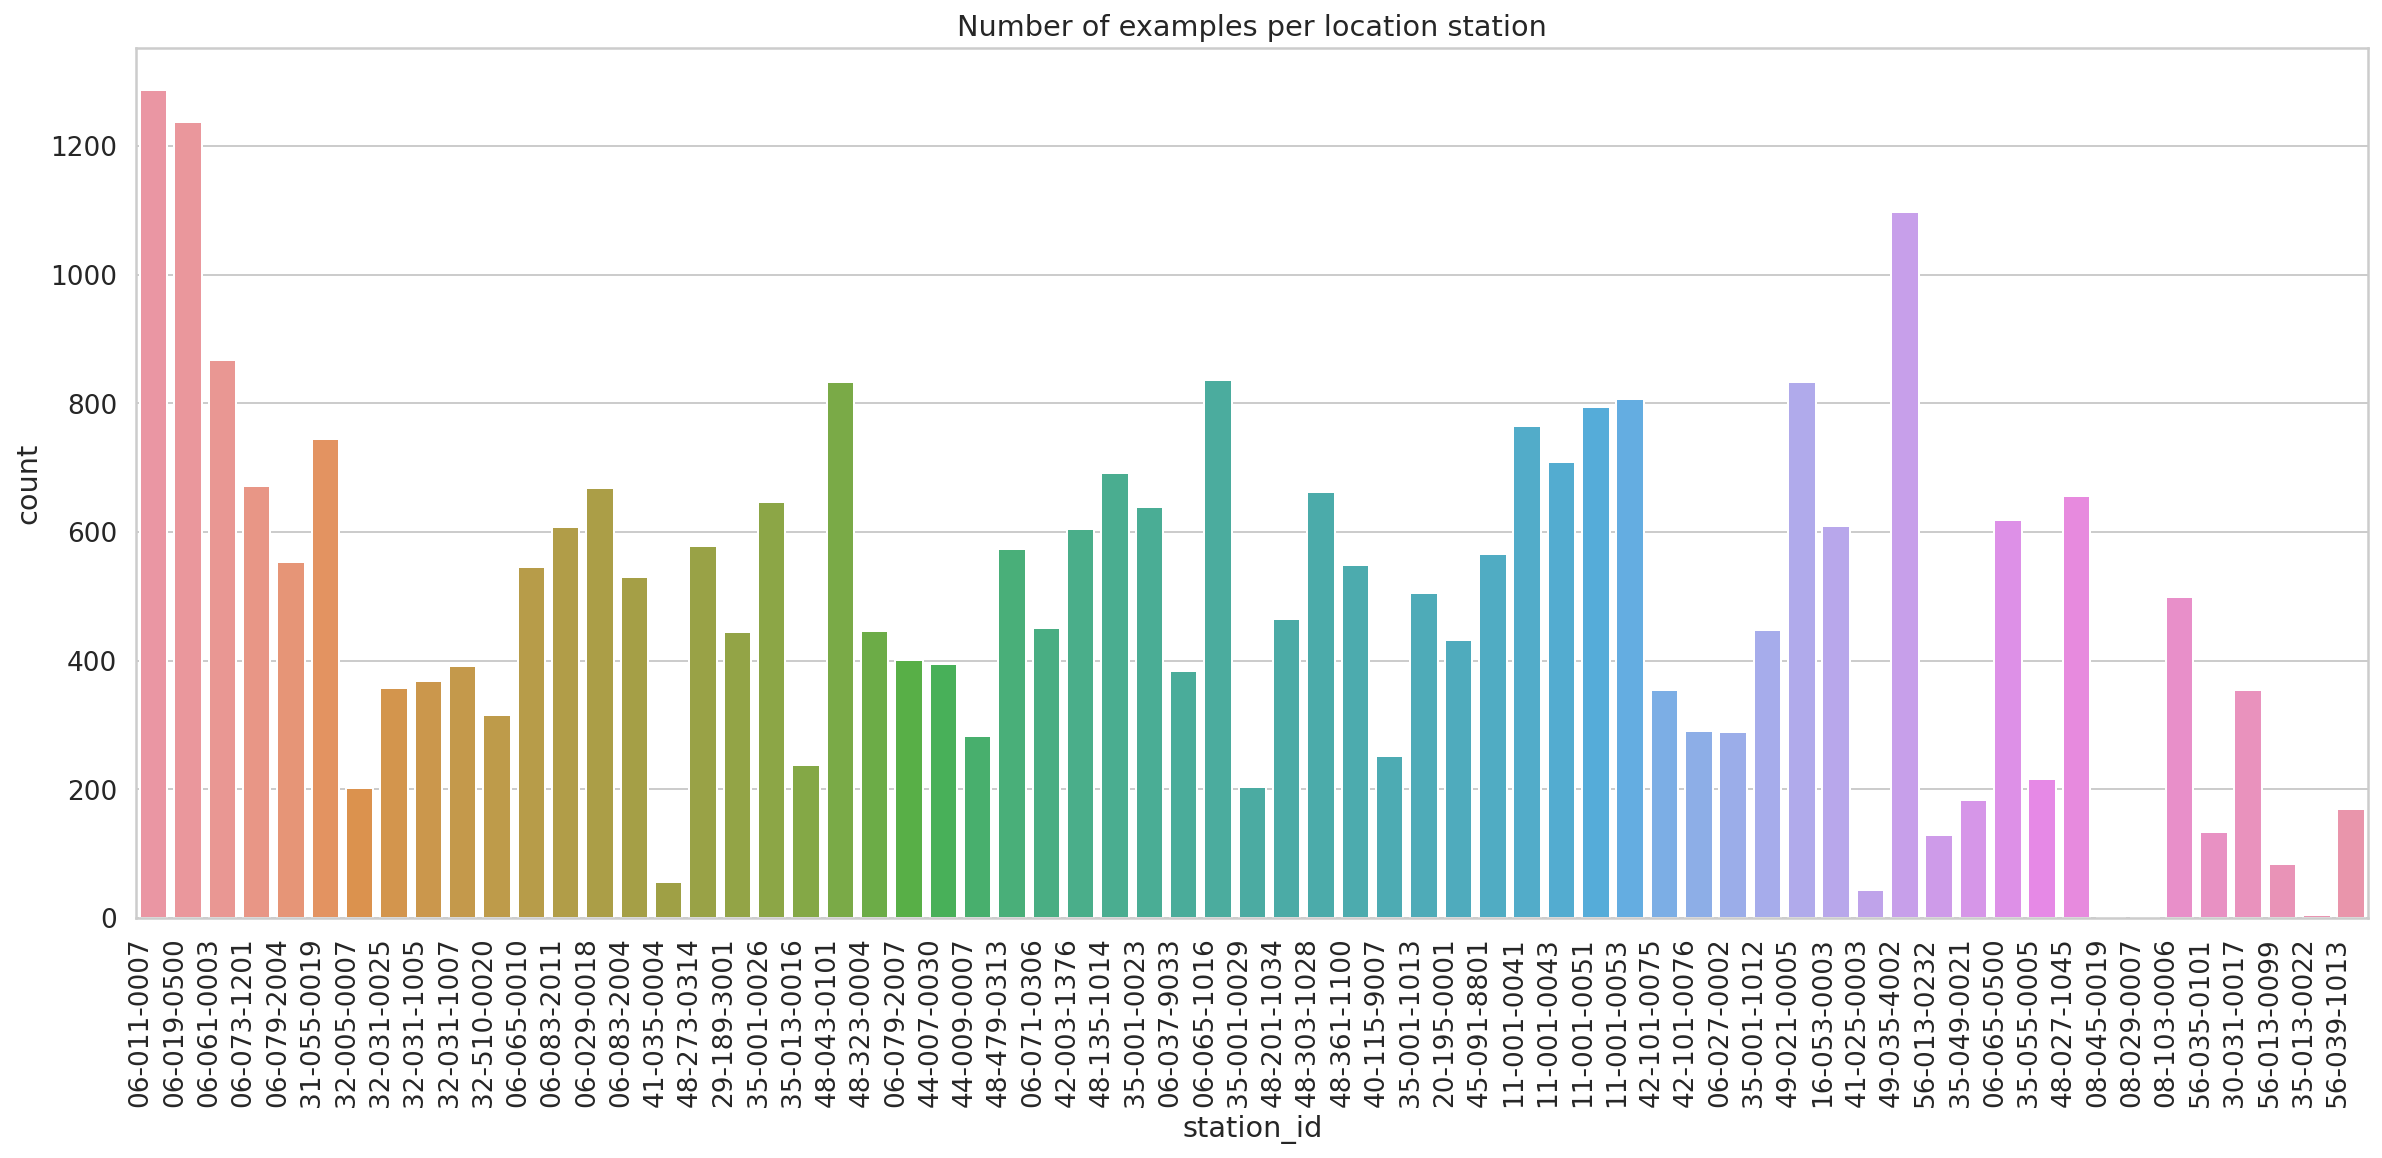

In [14]:
#Check number of exampels per category
plt.figure(figsize=(20,8))
chart = sns.countplot(df_cp.station_id)
plt.title("Number of examples per location station")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment= 'right')
plt.show()

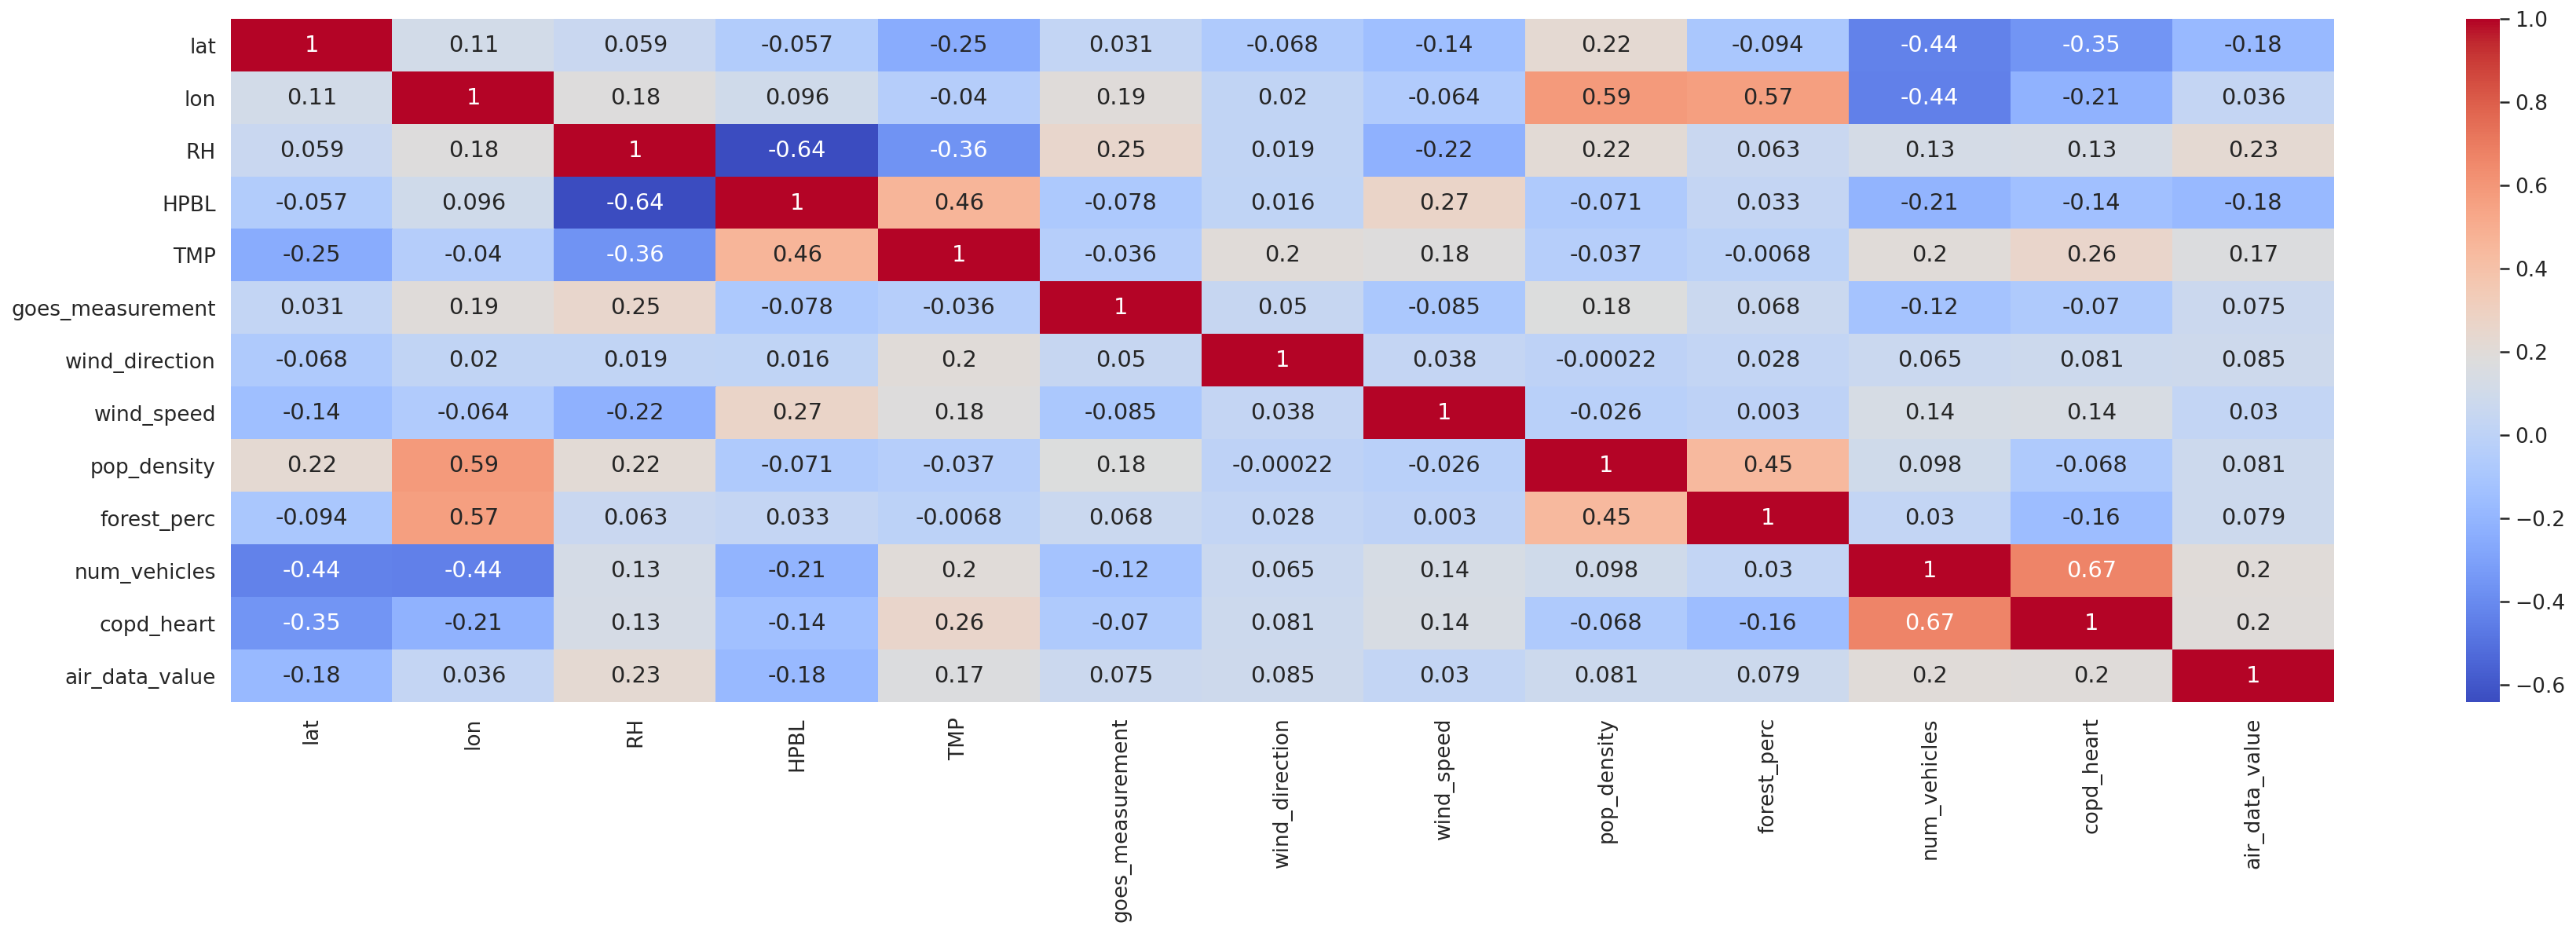

In [15]:
#check Pearson's correlation coeffcient
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

# Train-test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('air_data_value', axis=1), df['air_data_value'], test_size=0.30, random_state=RANDOM_SEED, shuffle = True)

In [17]:
X_train.head()

,lat,lon,RH,HPBL,TMP,goes_measurement,wind_direction,wind_speed,pop_density,forest_perc,num_vehicles,copd_heart
stime,,,,,,,,,,,,
2019-05-01 14:00:00,33.747236,-115.820124,41.200000,145.37193,285.55624,0.179254,70.015180,5.634113,657.080463,32.71,15065827.0,16914.0
2019-06-26 16:00:00,38.921847,-77.013178,47.400000,1918.49570,303.26360,0.491655,155.735610,3.215667,1613.304771,39.36,1922462.0,9951.0
2019-06-18 18:00:00,35.193240,-106.613815,29.200000,1894.25680,299.58707,0.546059,223.316797,2.146479,44.806827,31.99,655766.0,9336.0
2019-06-10 21:00:00,38.650329,-90.350313,31.800001,1700.61890,298.59433,0.211310,119.200251,5.417983,231.286107,35.16,2102216.0,6335.0
2019-06-28 20:00:00,33.747236,-115.820124,9.300000,739.86914,304.01470,0.061352,250.729766,5.383134,657.080463,32.71,15065827.0,16914.0


# Normalize the Data

In [18]:
#sclae the data using standard scalar
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

# Declare the scaling strategy
std_scaler_X = RobustScaler()
std_scaler_y = RobustScaler()

# Fit base features with training data
base_transformer = std_scaler_X.fit(X_train)

# Transform base features
X_train = base_transformer.transform(X_train)
X_test = base_transformer.transform(X_test)

# Fit label with training label
label_transformer = std_scaler_y.fit(y_train)

# Transform labels
y_train = label_transformer.transform(y_train)
y_test = label_transformer.transform(y_test)

X_train[:5]

array([[-6.79939404e-01, -4.03699183e-01,  1.23076923e-02,
        -7.22782792e-01, -7.51474548e-01, -9.22897221e-02,
        -1.03630202e+00,  8.98638500e-01,  6.32535461e-01,
        -3.31460674e-01,  1.73732192e+00,  5.77197150e-01],
       [ 4.06703294e-01,  1.29272327e+00,  2.03076923e-01,
         7.39536210e-01,  6.09591992e-01,  8.54906596e-01,
        -3.07217125e-01,  2.50872581e-02,  2.26906028e+00,
         9.13857678e-01,  0.00000000e+00, -3.41646873e-01],
       [-3.76285721e-01, -1.25088762e-03, -3.56923077e-01,
         7.19546064e-01,  3.26997525e-01,  1.01985993e+00,
         2.67586602e-01, -3.61107225e-01, -4.15336879e-01,
        -4.66292135e-01, -1.67434955e-01, -4.22802850e-01],
       [ 3.49685858e-01,  7.09698381e-01, -2.76923046e-01,
         5.59850285e-01,  2.50691108e-01,  4.90654219e-03,
        -6.17964265e-01,  8.20571720e-01, -9.61879433e-02,
         1.27340824e-01,  2.37603205e-02, -8.18817630e-01],
       [-6.79939404e-01, -4.03699183e-01, -9.6923076

# Model Generation

In [19]:
df_performance = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

In [20]:
def performance(model, y_test, y_pred):
    model_name = str(model)
    model_name = model_name.split('(')
    model_name = model_name[0]
    df_temp=pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    d =[ model_name, mae , mse, rmse, r2]
    df_temp = df_temp.append(pd.Series(d,index=['Model', 'MAE', 'MSE', 'RMSE', 'R2']),ignore_index=True)
    return df_temp

### Linear Regression

In [21]:
#linear regression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
df_performance = df_performance.append(performance(model_lr, y_test, y_pred))

In [22]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924


### SVM

In [23]:
#SVM regressor
p_svm = {'kernel': 'rbf', 'C':4}
model_svm = SVR(**p_svm)
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
df_performance = df_performance.append(performance(model_svm, y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924
0,SVR,0.472161,0.616899,0.785429,0.356728


### Random Forest

In [25]:
#random forest regressor
# The parameters are chosen after optimation
p_rf = {'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600,
 'random_state': RANDOM_SEED}

model_rf = RandomForestRegressor(**p_rf)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
df_performance = df_performance.append(performance(model_rf, y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


In [26]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924
0,SVR,0.472161,0.616899,0.785429,0.356728
0,RandomForestRegressor,0.426485,0.419427,0.647632,0.562642


### Feature Importance using Random Forest

No handles with labels found to put in legend.


wind_speed          0.188402
HPBL                0.130022
TMP                 0.127262
RH                  0.112689
goes_measurement    0.099276
wind_direction      0.096813
lat                 0.070963
lon                 0.068185
num_vehicles        0.036776
copd_heart          0.027828
pop_density         0.023198
forest_perc         0.018586
dtype: float64
0.9999999999999999


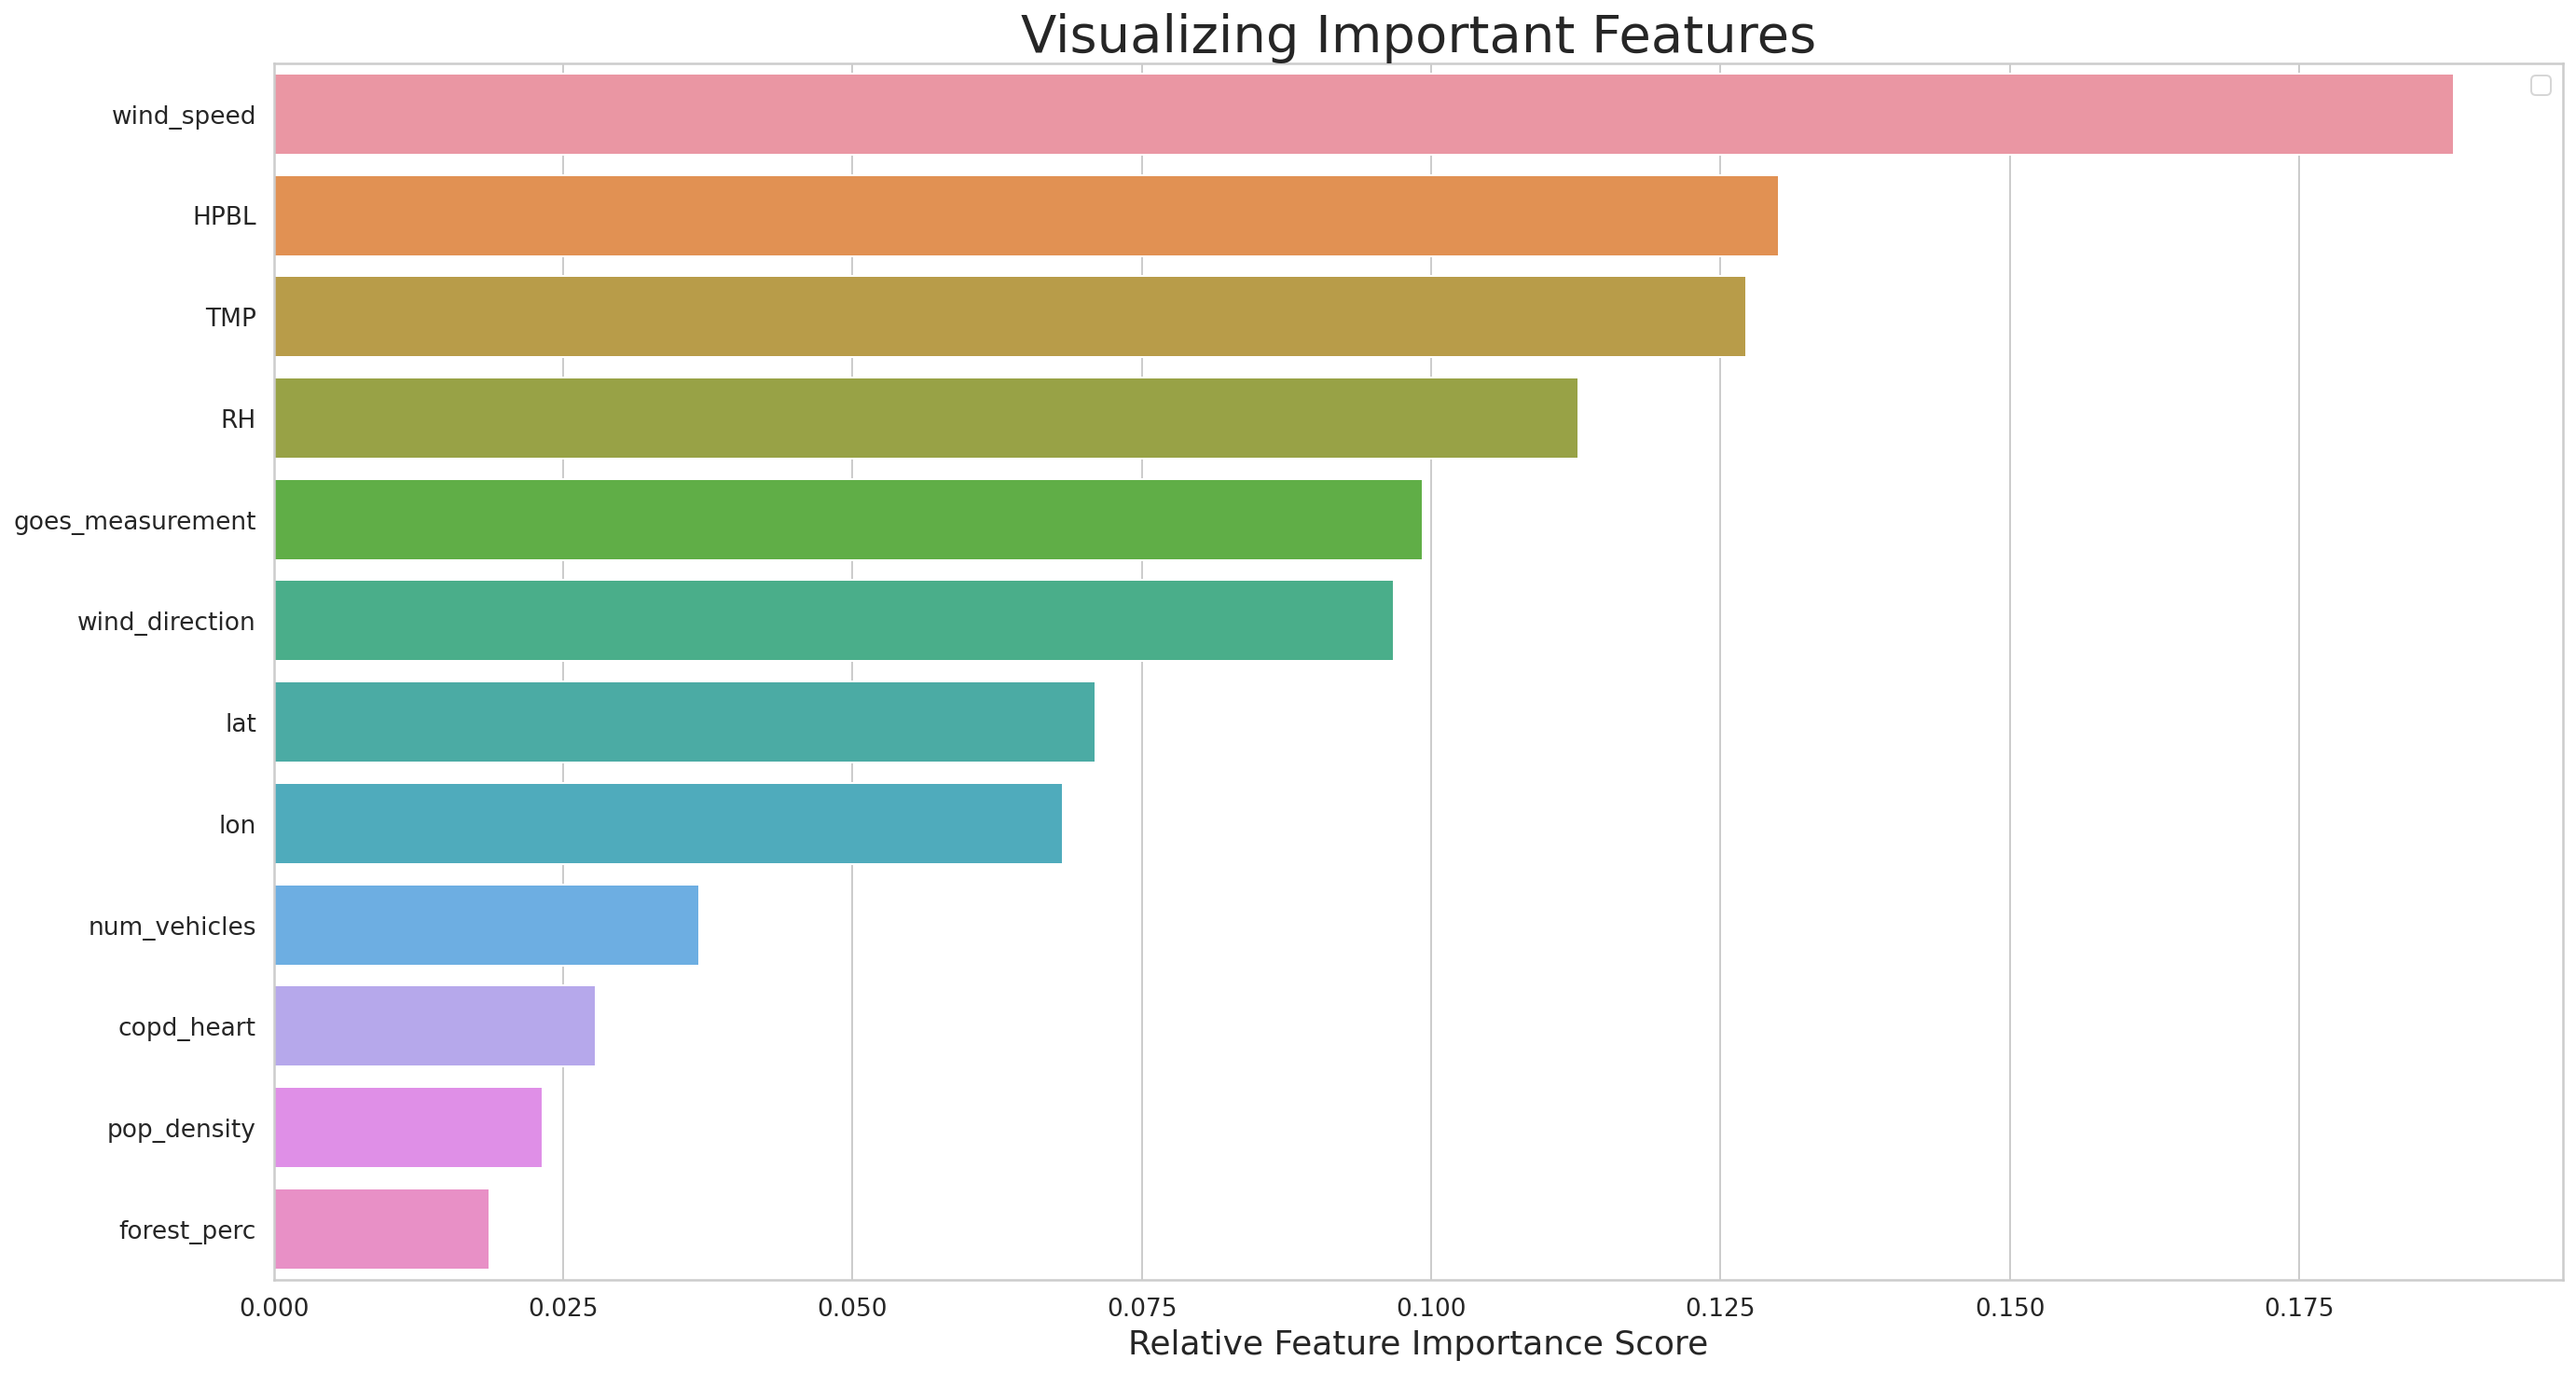

In [38]:
def average(nums, default=float('nan')):
    return sum(nums) / float(len(nums)) if nums else default
    
importances = model_rf.feature_importances_
indices = np.argsort(importances)

selected = selected_cols[:-1]

featureImpValues = []
feature_imp = (pd.Series(model_rf.feature_importances_,selected).tolist())    
featureImpValues.append(feature_imp)

feature_imp = []
feature_imp = [average(feature) for feature in zip(*featureImpValues)]
feature_sum = sum(feature_imp)
feature_labels=selected

features= pd.Series(feature_imp,feature_labels).sort_values(ascending=False)



print(features)
print(feature_sum)

# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Relative Feature Importance Score', fontsize=18)
#plt.ylabel('Features',fontsize=18)
plt.title("Visualizing Important Features",fontsize=28)
plt.legend()
plt.show()


### Gradient Boost

In [28]:
#gradient boost regressor
p_gb = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,'learning_rate': 0.09, 'loss': 'ls', 'random_state': RANDOM_SEED}
model_gb = GradientBoostingRegressor(**p_gb) 
model_gb.fit(X_train,y_train)
y_pred = model_gb.predict(X_test)
df_performance = df_performance.append(performance(model_gb, y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924
0,SVR,0.472161,0.616899,0.785429,0.356728
0,RandomForestRegressor,0.426485,0.419427,0.647632,0.562642
0,GradientBoostingRegressor,0.454599,0.477190,0.690789,0.502410


### Xtreme Gradient Boost

In [30]:
#xtreme gradient boost regressor
p_xgb = {'n_estimators': 700, 'max_depth': 12, 'learning_rate': 0.05, 'random_state': 12}
model_xgb = XGBRegressor(**p_xgb)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
df_performance = df_performance.append(performance(model_xgb, y_test, y_pred))

[04:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Compare Performance

In [31]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924
0,SVR,0.472161,0.616899,0.785429,0.356728
0,RandomForestRegressor,0.426485,0.419427,0.647632,0.562642
0,GradientBoostingRegressor,0.454599,0.477190,0.690789,0.502410
0,XGBRegressor,0.445941,0.458669,0.677251,0.521722


In [32]:
# y_train_inv = label_column_max_transformer.inverse_transform(y_train.reshape(1,-1))
# y_test_inv = label_column_max_transformer.inverse_transform(y_test.reshape(1,-1))
# y_pred_inv = label_column_max_transformer.inverse_transform(y_pred)

In [33]:
#xtreme gradient boost regressor
p_knn = {'n_neighbors': 5}
model_knn = KNeighborsRegressor(**p_knn)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
df_performance = df_performance.append(performance(model_knn, y_test, y_pred))

In [34]:
df_performance

,Model,MAE,MSE,RMSE,R2
0,LinearRegression,0.577161,0.786454,0.886823,0.179924
0,SVR,0.472161,0.616899,0.785429,0.356728
0,RandomForestRegressor,0.426485,0.419427,0.647632,0.562642
0,GradientBoostingRegressor,0.454599,0.477190,0.690789,0.502410
0,XGBRegressor,0.445941,0.458669,0.677251,0.521722
0,KNeighborsRegressor,0.482632,0.549807,0.741490,0.426688


# Hyper Parameter Optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
df_performance = df_performance.append(performance(rf_random, y_test, y_pred))

In [ ]:
rf_random.best_params_